In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline                 

In [2]:
df = pd.read_csv("C:/Users/pasli/Downloads/archive (6)/churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
binary_cols

['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

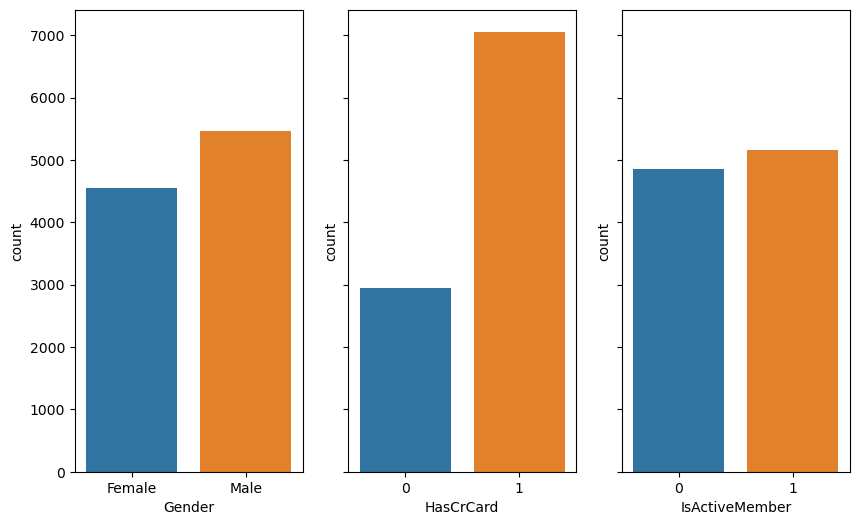

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
sns.countplot("Gender", data=df, ax=axes[0])
sns.countplot("HasCrCard", data=df, ax=axes[1])
sns.countplot("IsActiveMember", data=df, ax=axes[2])

In [7]:
df[['Gender','Exited']].groupby(["Gender"]).mean()

,Exited
Gender,
Female,0.250715
Male,0.164559


In [8]:
df[['HasCrCard','Exited']].groupby(["HasCrCard"]).mean()

,Exited
HasCrCard,
0,0.208149
1,0.201843


In [9]:
df[['IsActiveMember','Exited']].groupby(["IsActiveMember"]).mean()

,Exited
IsActiveMember,
0,0.268509
1,0.142691


In [10]:
df[['Geography','Exited']].groupby('Geography').mean()

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


<AxesSubplot:xlabel='Geography', ylabel='count'>

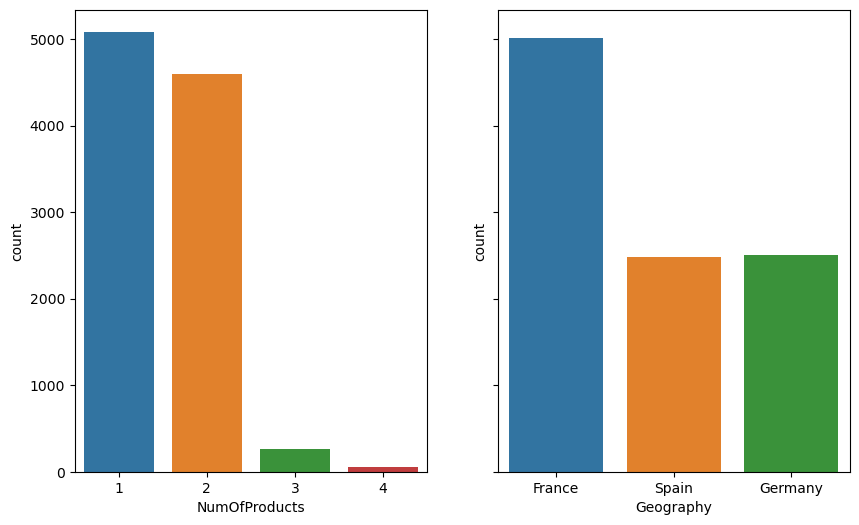

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot("NumOfProducts", data=df, ax=axes[0])
sns.countplot("Geography", data=df, ax=axes[1])

In [12]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [13]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df[['NumOfProducts','Exited']].groupby('NumOfProducts').mean()

,Exited
NumOfProducts,
1,0.277144
2,0.075817
3,0.827068
4,1.000000


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

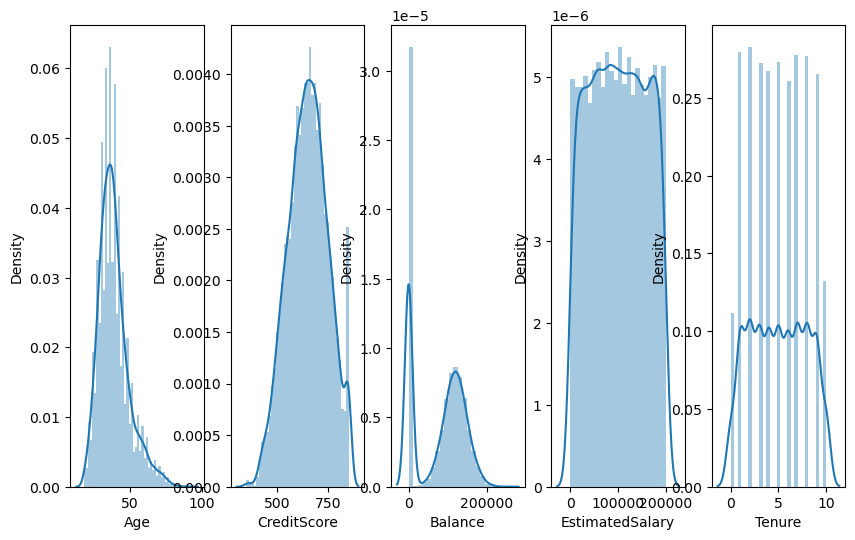

In [15]:
fig, axes = plt.subplots(1,5, figsize=(10, 6))
sns.distplot(df["Age"], ax=axes[0])
sns.distplot(df["CreditScore"], ax=axes[1])
sns.distplot(df["Balance"], ax=axes[2])
sns.distplot(df["EstimatedSalary"], ax=axes[3])
sns.distplot(df["Tenure"], ax=axes[4])

In [16]:
df[['Tenure','EstimatedSalary','Balance','CreditScore','Age','Exited']].groupby('Exited').mean()

,Tenure,EstimatedSalary,Balance,CreditScore,Age
Exited,,,,,
0,5.033279,99738.391772,72745.296779,651.853196,37.408389
1,4.932744,101465.677531,91108.539337,645.351497,44.837997


In [17]:
df[['EstimatedSalary','Balance']].groupby('Balance').mean()

,EstimatedSalary
Balance,
0.00,98983.559549
3768.69,177065.240000
12459.19,156787.340000
14262.80,54689.160000
16893.59,77502.560000
...,...
216109.88,74176.710000
221532.80,171867.080000
222267.63,101108.850000


In [18]:
corr = np.corrcoef(df["EstimatedSalary"], df["Balance"])[0,1]
corr

0.012797496340555697

In [19]:
corr = np.corrcoef(df["EstimatedSalary"], df["CreditScore"])[0,1]
corr

-0.001384292867984518

In [20]:
corr = np.corrcoef(df["CreditScore"], df["Balance"])[0,1]
corr

0.006268381616008735

In [21]:
corr = np.corrcoef(df["EstimatedSalary"], df["Age"])[0,1]
corr

-0.007201042376657296

In [22]:
df.drop(["CustomerId","Surname","HasCrCard","RowNumber"], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,0,92888.52,1


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [36]:
cat_features = ['Geography', 'NumOfProducts', 'IsActiveMember',"Gender"]
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [37]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['Tenure']])
b = sc.fit_transform(df[['EstimatedSalary']])
X['tenure'] = a
X['EstimatedSalary'] = b

In [38]:
X.shape

(10000, 14)

Text(0.5, 1.0, 'Class Distribution Before Resampling')

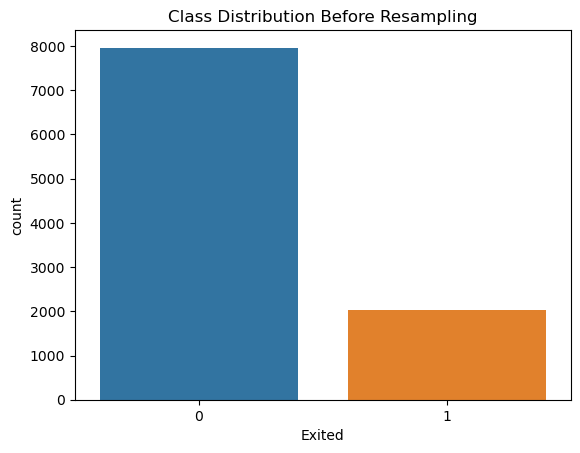

In [39]:
sns.countplot('Exited', data=df).set_title('Class Distribution Before Resampling')

In [40]:
X_no = X[X.Exited == 0]
X_yes = X[X.Exited == 1]

In [41]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

7963


Text(0.5, 1.0, 'Class Distribution After Resampling')

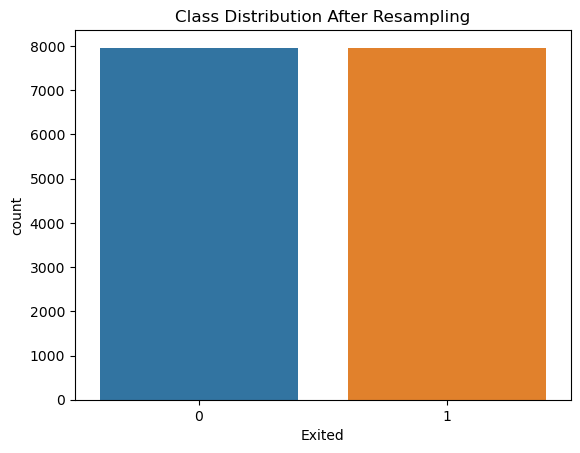

In [42]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Exited', data=X_upsampled).set_title('Class Distribution After Resampling')

In [43]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Exited'], axis=1)
y = X_upsampled['Exited']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [45]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [46]:
clf_ridge = RidgeClassifier()
clf_ridge.fit(X_train, y_train)

RidgeClassifier()

In [47]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7535321821036107

In [48]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.7649089767733835

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [51]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8891679748822606

In [52]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.849654739485248

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [55]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [57]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 250}

In [58]:
clf.best_score_

0.9497678126733817

In [59]:
clf_forest = RandomForestClassifier(n_estimators=250, max_depth=25)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [61]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.9494664155681105